# Ultimate Data Science Challenge

## Part 1 - EDA

The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15-minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Read json file as panda dataframe
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [2]:
#Check type of data
type(logins.login_time[0])

pandas.tslib.Timestamp

In [3]:
#Resample for every 15 minutes and count number of log-ins during that period
resamp_logins = logins.resample('15Min', on = 'login_time').count()
resamp_logins.head()

,login_time
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


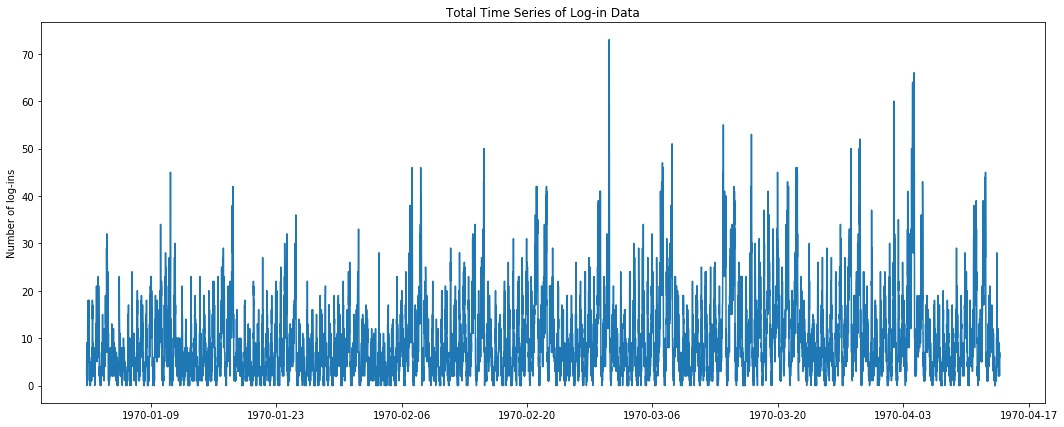

In [4]:
#Plot total time series on 15-minute intervals
fig = plt.figure(figsize = (18, 7))
fig = plt.plot(resamp_logins.index, resamp_logins.login_time)
plt.title('Total Time Series of Log-in Data');
plt.ylabel('Number of log-ins');

From the time-series plot above, it does appear that log-ins are cyclical.

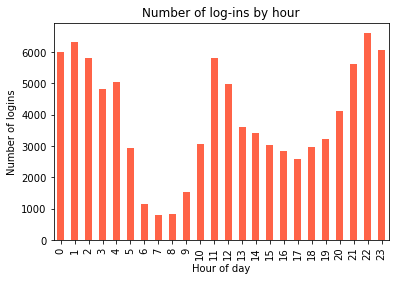

In [5]:
#Plot hourly log-ins
hourly_logins = resamp_logins.groupby(resamp_logins.index.hour)['login_time'].sum().plot(kind = 'bar', color = 'tomato')
plt.title('Number of log-ins by hour');
plt.xlabel('Hour of day');
plt.ylabel('Number of logins');

We can see from the above graph that log-ins are more frequent late at night and early in the morning, dipping sharply in the mid-morning hours.  Log-ins increase however around lunchtime and into the early afternoon.

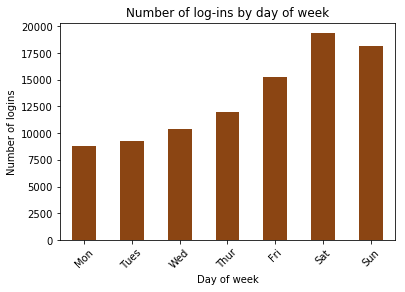

In [6]:
#Plot log-ins by day of week
daily_logins = resamp_logins.groupby(resamp_logins.index.dayofweek)['login_time'].sum().plot(kind = 'bar', color = 'saddlebrown')
plt.title('Number of log-ins by day of week');
plt.xlabel('Day of week');
plt.xticks(range(7), ['Mon', 'Tues', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'], rotation = 45)
plt.ylabel('Number of logins');

Log-ins increase steadily over the course of the week, with most log-ins occurring over the weekend.

## Part 2 - Experiment and Metrics Design

The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.

However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.

1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?

2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
    
    a. how you will implement the experiment
    
    b. what statistical test(s) you will conduct to verify the significance of the observation  
    
    c. how you would interpret the results and provide recommendations to the city operations team along with any caveats.

1) I would measure bridge crossings by driver partners as the success criterion since this is the intended effect of the toll reimbursement program.

2) First we would need to collect data before implementing the change to ensure that we can measure the difference.  We can ask our driver partners to log their bridge crossings for a few months before the proposed change takes effect (or perhaps track them using GPS to know when they've crossed the bridge).  Once the change has been implemented, we continue collecting this data to determine if bridge crossings have increased.

We can determine if daily crossings have increased at a statistically significant level by applying the t-test to the mean of the daily crossings before the toll reimbursement program and the mean of the daily crossings after the program. For this analysis, the null hypothesis is that daily crossings after the program implementation either decreased or did not change.  We would run a one-tailed test since we are only interested in knowing if the number of daily crossings has *increased*. If the p-value is less than 0.5, we can safely reject the null hypothesis and conclude that the toll reimbursements contributed to more bridge crossings.

Recommendations to the city operations team with a p-value of less than 0.5 would be to continue the toll reimbursement program.  However, if the p-value is greater than 0.05, we cannot conclude that bridge crossings have increased.  A stronger incentive might be needed to encourage bridge crossings.  A disclaimer about using the p-value is that 0.05 is somewhat of an arbitrary cut-off and if we calculated a p-value close to that number (i.e 0.06), we would want to collect more data before safely reaching a conclusion.

## Part 3 - Predictive Modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm rider retention (again, a few sentences will suffice).

In [7]:
#Need clean up JSON string before loading into dataframe
import json
import re

with open('ultimate_data_challenge.json', 'r') as data_file:
   json_data = data_file.read()

regex = re.compile(r'\bNaN\b', flags=re.IGNORECASE)
json_data_sanitized = re.sub(regex, ' null ', json_data)

users = pd.read_json(json_data_sanitized)
users = users.dropna() #remove any rows with missing data
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [8]:
#Check column types
users.dtypes

avg_dist                  float64
avg_rating_by_driver      float64
avg_rating_of_driver      float64
avg_surge                 float64
city                       object
last_trip_date             object
phone                      object
signup_date                object
surge_pct                 float64
trips_in_first_30_days      int64
ultimate_black_user          bool
weekday_pct               float64
dtype: object

In [9]:
#Convert date columns to timestamps
users.signup_date = pd.to_datetime(users.signup_date)
users.last_trip_date = pd.to_datetime(users.last_trip_date)

In [10]:
#Finding latest trip in the dataframe
max(users.last_trip_date)

Timestamp('2014-07-01 00:00:00')

In [11]:
#Assuming that 30 days previous is what we can define as "retained"
import datetime

def label_retained(row):
    return users.last_trip_date < datetime.datetime.strptime('2014-06-01', '%Y-%m-%d')

users = users.assign(retained = lambda row: label_retained(row))
users.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,retained
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,True
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,True
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,False
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,True


In [12]:
#Determine total fraction of users retained
print('Fraction of users retained: {:.2f}'.format(users[users.retained == True].size / users.size))

Fraction of users retained: 0.59


In [13]:
#Explore how phone type affects retention
phone_retained = pd.DataFrame({'count' : users.groupby( ['phone', 'retained'] ).size()}).reset_index()
phone_retained

,phone,retained,count
0,Android,False,2804
1,Android,True,9289
2,iPhone,False,14231
3,iPhone,True,15121


In [14]:
def find_lost_pct(groupby, variable, value):
    return groupby[groupby[variable] == value].iloc[0,2] * 100 / (groupby[groupby[variable] == value].iloc[0,2] + groupby[groupby[variable] == value].iloc[1,2])

pct_android_lost = find_lost_pct(phone_retained, 'phone', 'Android')
pct_iphone_lost = find_lost_pct(phone_retained, 'phone', 'iPhone')
print('Pct Androids lost = {:.2f} \nPct iPhones lost = {:.2f}'.format(pct_android_lost, pct_iphone_lost))

Pct Androids lost = 23.19 
Pct iPhones lost = 48.48


It would definitely appear that iPhones are lost at a greater frequency than Androids.

In [15]:
city_retained = pd.DataFrame({'count' : users.groupby( ['city', 'retained'] ).size()}).reset_index()
city_retained

,city,retained,count
0,Astapor,False,3829
1,Astapor,True,9680
2,King's Landing,False,5736
3,King's Landing,True,3039
4,Winterfell,False,7470
5,Winterfell,True,11691


In [16]:
pct_astapor_lost = find_lost_pct(city_retained, 'city', 'Astapor')
pct_kingslanding_lost = find_lost_pct(city_retained, 'city', 'King\'s Landing')
pct_winterfell_lost = find_lost_pct(city_retained, 'city', 'Winterfell')
print('Pct Astapor lost = {:.2f} \nPct King\'s Landing lost = {:.2f} \nPct Winterfell lost = {:.2f}'
      .format(pct_astapor_lost, pct_kingslanding_lost, pct_winterfell_lost))

Pct Astapor lost = 28.34 
Pct King's Landing lost = 65.37 
Pct Winterfell lost = 38.99


Customers hailing from King's Landing are leaving Ultimate Technologies at nearly double the rate of the other cities.

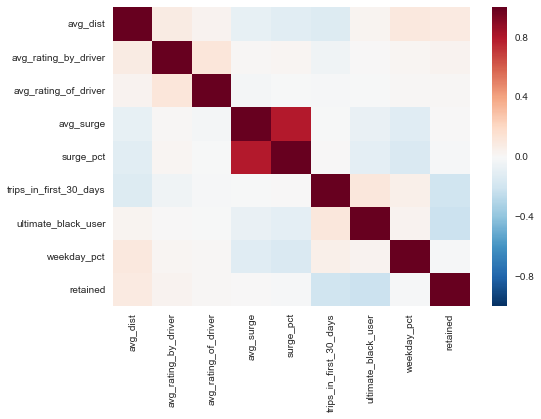

In [17]:
#Look at correlation between features
import seaborn as sns
sns.set_style(style = 'white')

sns.heatmap(users.corr());

We can see that the only features that correlate highly are average surge and surge percent. 

In [18]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import label_binarize

#Remove predicted values (retained) and date columns.  Binarize city and phone columns and predicted values.
x_data = users.drop(['retained', 'avg_surge', 'last_trip_date', 'signup_date'], axis = 1)
x_data.city = label_binarize(x_data.city, classes=[0, 1, 2])
x_data.phone = label_binarize(x_data.phone, classes=[0, 1])
y = label_binarize(users.retained, classes=[True, False]).ravel()

# Split the data into a training and test set.
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y,
                                                    random_state = 10)

#Trying logistic regression
clf = LogisticRegression(random_state = 10)
# Fit the model on the training data.
clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print('Logit Regression Accuracy: {:.2f}'.format(accuracy_score(clf.predict(x_test), y_test)))

Logit Regression Accuracy: 0.64


In [19]:
score = cross_val_score(clf, x_data, y, cv = 5, scoring = 'neg_mean_squared_error')
print('Cross-validation score = {:.2f}'.format(np.mean(np.abs(score))))

Cross-validation score = 0.35


In [20]:
print('MSE for training response data: {:.2f}'.format(np.mean((clf.predict(x_train) - y_train) **2)))
print('MSE for test response data: {:.2f}'.format(np.mean((clf.predict(x_test) - y_test) ** 2)))

MSE for training response data: 0.34
MSE for test response data: 0.36


In [21]:
from sklearn.metrics import roc_auc_score

y_score = clf.fit(x_train, y_train).decision_function(x_test)
print('AUROC score: {:.2f}'.format(roc_auc_score(y_test, y_score)))

AUROC score: 0.66


In [23]:
clf.coef_

array([[ -3.16509411e-02,  -1.19009387e-01,  -4.65214622e-03,
          0.00000000e+00,   0.00000000e+00,   2.88229517e-03,
          1.09433045e-01,   8.94453471e-01,   2.99666510e-04]])

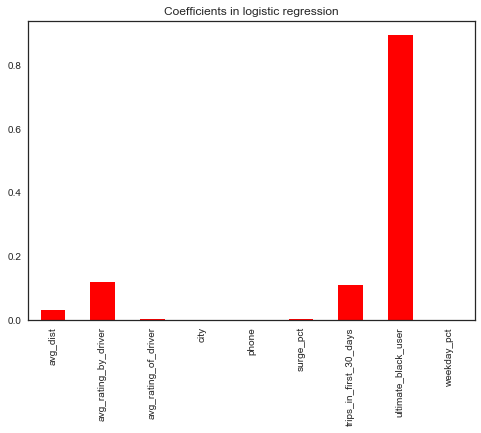

In [28]:
pd.Series(np.abs(clf.coef_[0,:]), index = x_data.columns).plot(kind = 'bar', color = 'r')
plt.title('Coefficients in logistic regression');

In [30]:
users.groupby(['ultimate_black_user', 'retained'])['retained'].count()

ultimate_black_user  retained
False                False        8336
                     True        17190
True                 False        8699
                     True         7220
Name: retained, dtype: int64

Based on the MSE's for training and test data, we can see that the logistic regression model is not overfit and the AUROC (area under the receiver operator characteristic) is higher than 0.5 but not quite high enough to be considered a good predictive model.  The coefficient for whether or not the user was an ultimate black user was the highest of the features selected, and a groupby object shows that those who were not an ultimate black user were much more likely to be retained.

In [31]:
#Trying random forest regression
rf_clf = RandomForestClassifier(random_state = 10)
# Fit the model on the training data.
rf_clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print('RF Regression Accuracy: {:.2f}'.format(accuracy_score(rf_clf.predict(x_test), y_test)))

RF Regression Accuracy: 0.69


In [32]:
num_correct = 0
predicted = rf_clf.predict(x_test)
for i in range(len(x_test)):
    if predicted[i] == y_test[i]:
        num_correct += 1
        
print('Pct correct: {:.2f}'.format(num_correct/float(len(y_test))))

Pct correct: 0.69


In [33]:
print('MSE for training response data: {:.2f}'.format(np.mean((rf_clf.predict(x_train) - y_train) **2)))
print('MSE for test response data: {:.2f}'.format(np.mean((rf_clf.predict(x_test) - y_test) ** 2)))

MSE for training response data: 0.03
MSE for test response data: 0.31


In [34]:
f1score = f1_score(y_test, rf_clf.predict(x_test))
print('F1 score: {:.2f}'.format(f1score))

F1 score: 0.61


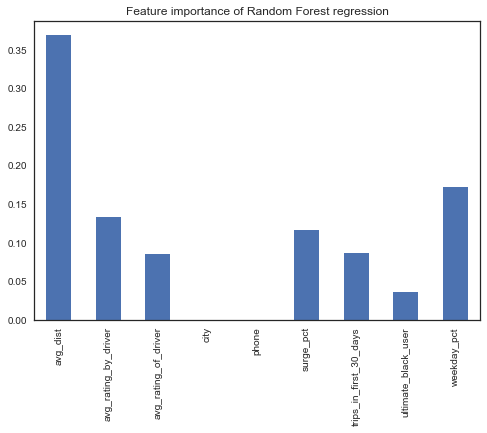

In [35]:
pd.Series(rf_clf.feature_importances_, index = x_data.columns).plot(kind = 'bar')
plt.title('Feature importance of Random Forest regression');

In [36]:
users.groupby('retained')['avg_dist'].mean()

retained
False    4.908831
True     5.844723
Name: avg_dist, dtype: float64

The random forest classifier is overfit as shown by the relatively large jump in MSE from the training to the test set but the MSE on the test set is in line with the logistic regression MSE's.  Accuracy and the F1 score for the random forest classifier are decent.  We can see from the feature importance graph above that the average distance driven is the most important feature when determining retention.  It appears that the users who stick with the company take longer trips on average.

In [39]:
#Trying SVM
svc_clf = SVC(kernel = 'linear', random_state = 10)
# Fit the model on the training data.
svc_clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print('SVM Accuracy: {:.2f}'.format(accuracy_score(svc_clf.predict(x_test), y_test)))

SVM Accuracy: 0.62


In [40]:
svc_clf = SVC(kernel = 'rbf', random_state = 10)
# Fit the model on the training data.
svc_clf.fit(x_train, y_train)
# Print the accuracy from the testing data.
print('SVM Accuracy: {:.2f}'.format(accuracy_score(svc_clf.predict(x_test), y_test)))

SVM Accuracy: 0.73


RBF kernel results in much better accuracy.

In [41]:
print('MSE for training response data: {:.2f}'.format(np.mean((svc_clf.predict(x_train) - y_train) **2)))
print('MSE for test response data: {:.2f}'.format(np.mean((svc_clf.predict(x_test) - y_test) ** 2)))
score = cross_val_score(svc_clf, x_data, y, cv = 5, scoring = 'neg_mean_squared_error')
print('Cross-validation score = {:.2f}'.format(np.mean(np.abs(score))))

MSE for training response data: 0.22
MSE for test response data: 0.27
Cross-validation score = 0.26


While logistic regression and random forest classifier were considered, SVM is the most accurate algorithm in this case with an accuracy of 73%.  However, hyperparameters should be tuned for better performance on this model to increase accuracy.  The SVM model also has low MSE's on both training and test data and does not appear to be overfit.

Due to the large feature importance of the average distance in the random forest regression, I would recommend that the company offer incentives for longer trips as customers who travel longer distances are more likely to be retained.  Additionally, ultimate black users are leaving the company at a much greater rate than other customers, and incentives should be targeted to those users to encourage them to stay. 